In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [179]:
df = pd.read_csv(r"C:\Users\Asus\Desktop\proekt\ratings\cwurData.csv")
df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [36]:
def df_info(df):
    print('DATASET SHAPE: ', df.shape, '\n')
    print('-'*50)
    print('FETURE DATA TYPES:')
    print(df.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(df.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(df.isnull().sum())
    print('\n', '-'*50)
    print('PERCENT OF NULL VALUES IN EACH COLUMN')
    print(df.isna().sum()/df.shape[0]*100)
    print('\n', '-'*50)
    print('STANDART DEVITATION FOR NUMERIC COLUMNS')
    print(df.std(numeric_only=True))
    print('\n', '-'*50)
    print('MEDIAN OF NUMERIC COLLUMNS')
    print(df.median(numeric_only=True))

## EDA
Full information about my dataset

In [64]:
df_info(df)

DATASET SHAPE:  (2000, 14) 

--------------------------------------------------
FETURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 200 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2000 non-null   int64  
 1   institution           2000 non-null   object 
 2   country               2000 non-null   object 
 3   national_rank         2000 non-null   int64  
 4   quality_of_education  2000 non-null   int64  
 5   alumni_employment     2000 non-null   int64  
 6   quality_of_faculty    2000 non-null   int64  
 7   publications          2000 non-null   int64  
 8   influence             2000 non-null   int64  
 9   citations             2000 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2000 non-null   int64  
 12  score                 2000 non-null   float64
 13  year                  

## Information
Dataset has 2200 rows anf 14 columns: 2 object columns, 2 float columns and 10 integer columns. In broad_impact column i have 200 null values, this only 10% of my dataset, so i decided to delete rows which contain null values.

In [168]:
df = df.dropna(how = 'any')
df[:20]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014
205,6,Columbia University,USA,4,13,8,9,14,13,9,13.0,4,97.41,2014
206,7,"University of California, Berkeley",USA,5,4,22,6,7,4,3,7.0,28,92.84,2014
207,8,University of Chicago,USA,6,10,14,8,17,19,10,18.0,149,92.03,2014
208,9,Princeton University,USA,7,5,16,3,70,25,19,41.0,204,88.56,2014
209,10,Yale University,USA,8,9,25,11,18,7,32,19.0,45,88.11,2014


## Hypothesis
My hypothesis is: Quality of education has the biggest influence to university score

In [39]:
columns = ['quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents', 'score']
data_cor = df[columns]
matrix = data_cor.corr()

correlation = correlation_matrix['score'].sort_values(ascending=False)

correlation

score                   1.000000
patents                -0.460210
alumni_employment      -0.493508
citations              -0.523585
influence              -0.526225
publications           -0.526862
broad_impact           -0.531590
quality_of_education   -0.604385
Name: score, dtype: float64

## Conclusion about hypothesis:
Quality of education has the biggest influence on final score. Correlation of all aspects is negative, it is because dataset is rating, in rating the lower the value, the result is better Absolute value of 'quality_of_education' is the biggest one 

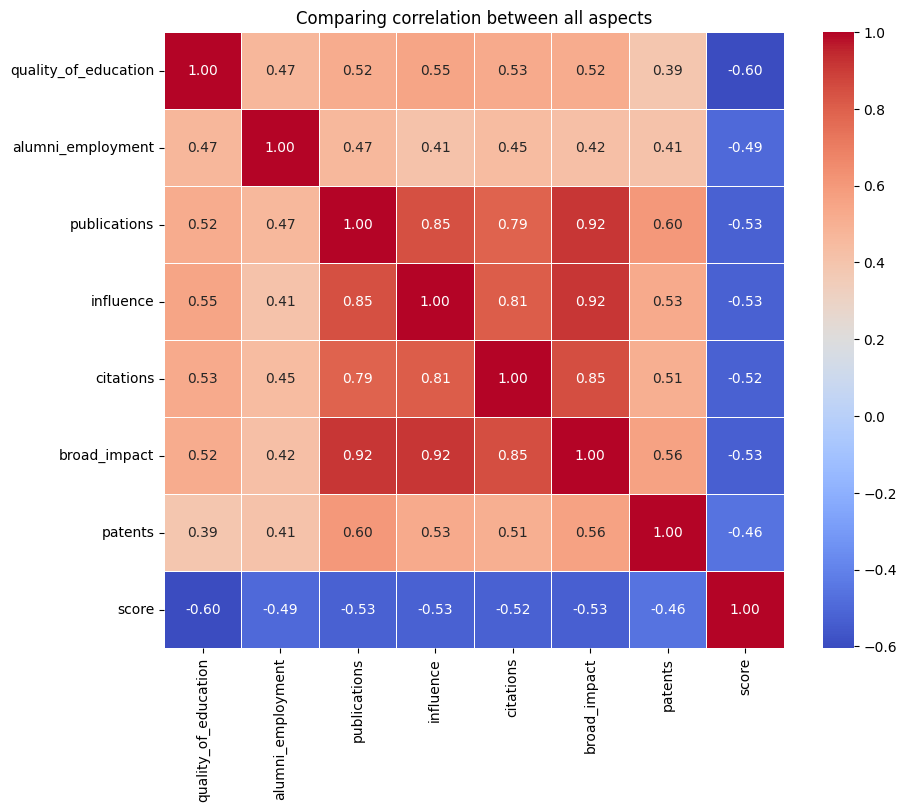

In [71]:
columns = ['quality_of_education', 'alumni_employment', 'publications', 'influence', 'citations', 'broad_impact', 'patents', 'score']
data = df[columns]
matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Comparing correlation between all aspects')
plt.show()

## Top 5 universities by some aspects
Remark: The shorter the column in this bar chart, the better the university is doing. 

## From this charts we can see that universities in the USA are strong on these aspects.

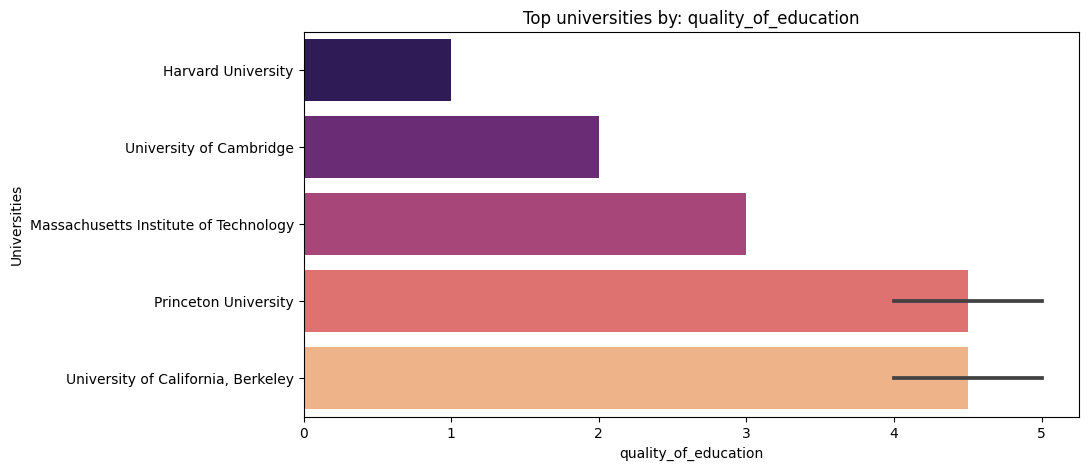

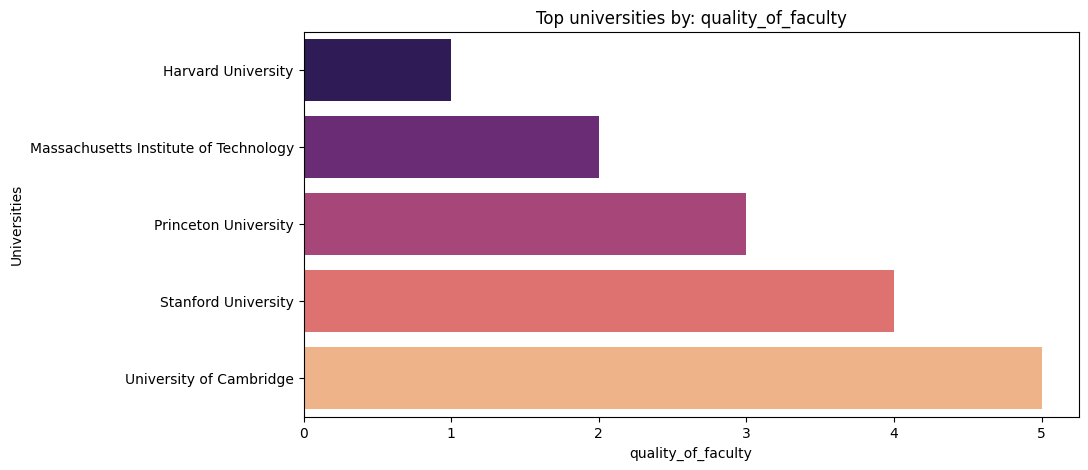

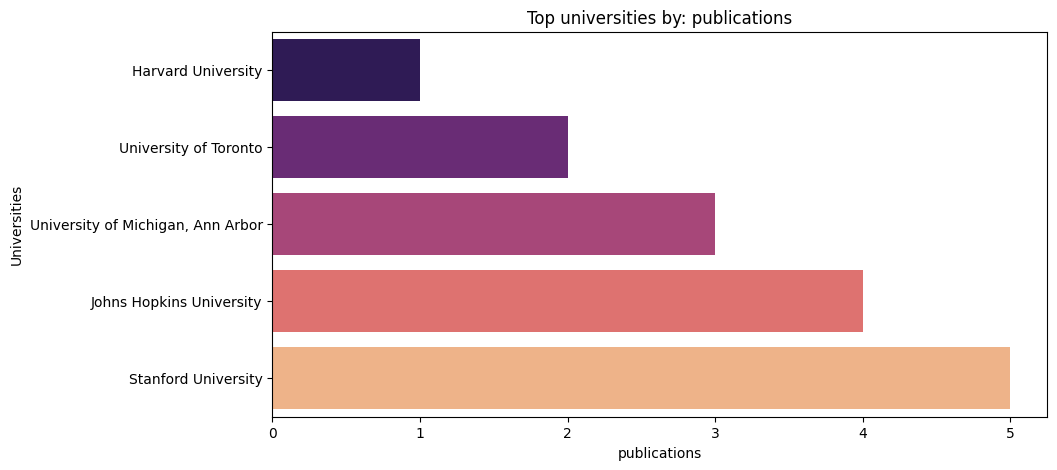

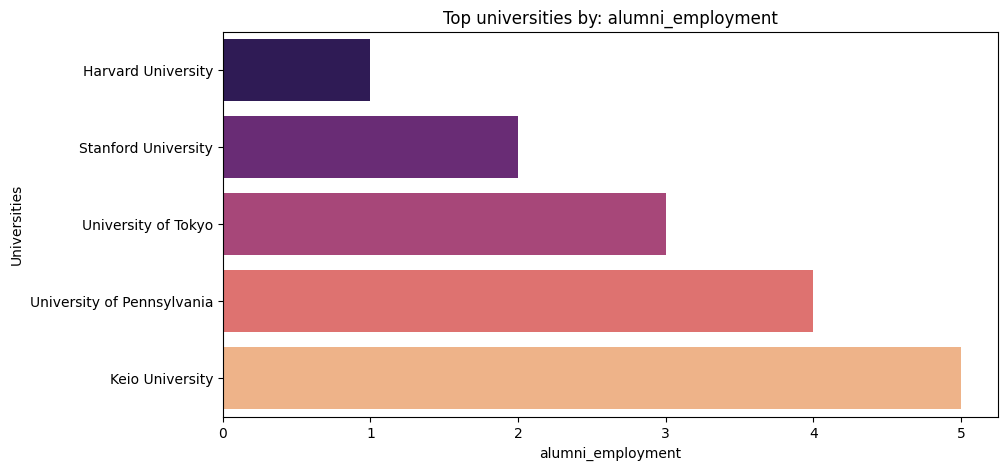

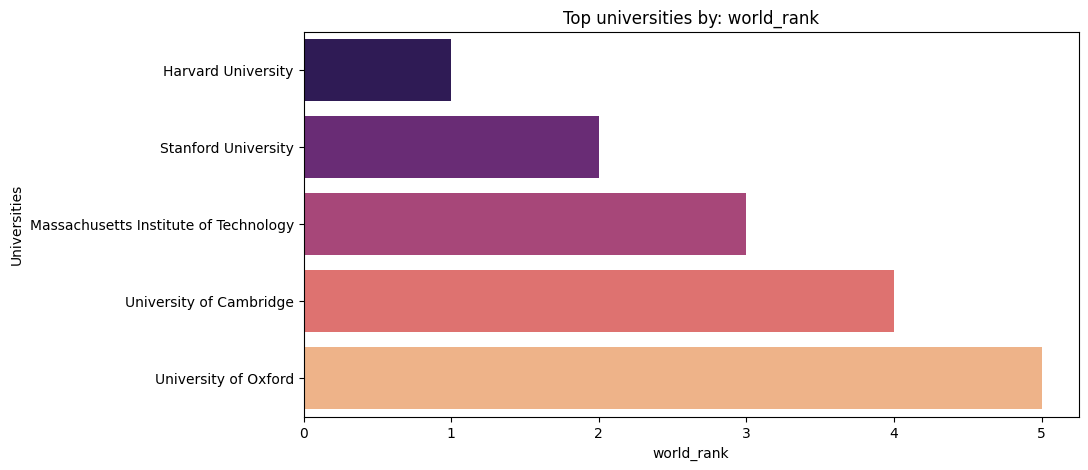

In [100]:
aspects = ['quality_of_education', 'quality_of_faculty', 'publications', 'alumni_employment', 'world_rank']

for aspect in aspects:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=aspect, y='institution', data=df.sort_values(by=aspect)[:10], palette='magma')
    plt.title(f'Top universities by: {aspect}')
    plt.xlabel(aspect)
    plt.ylabel('Universities')
    plt.show()

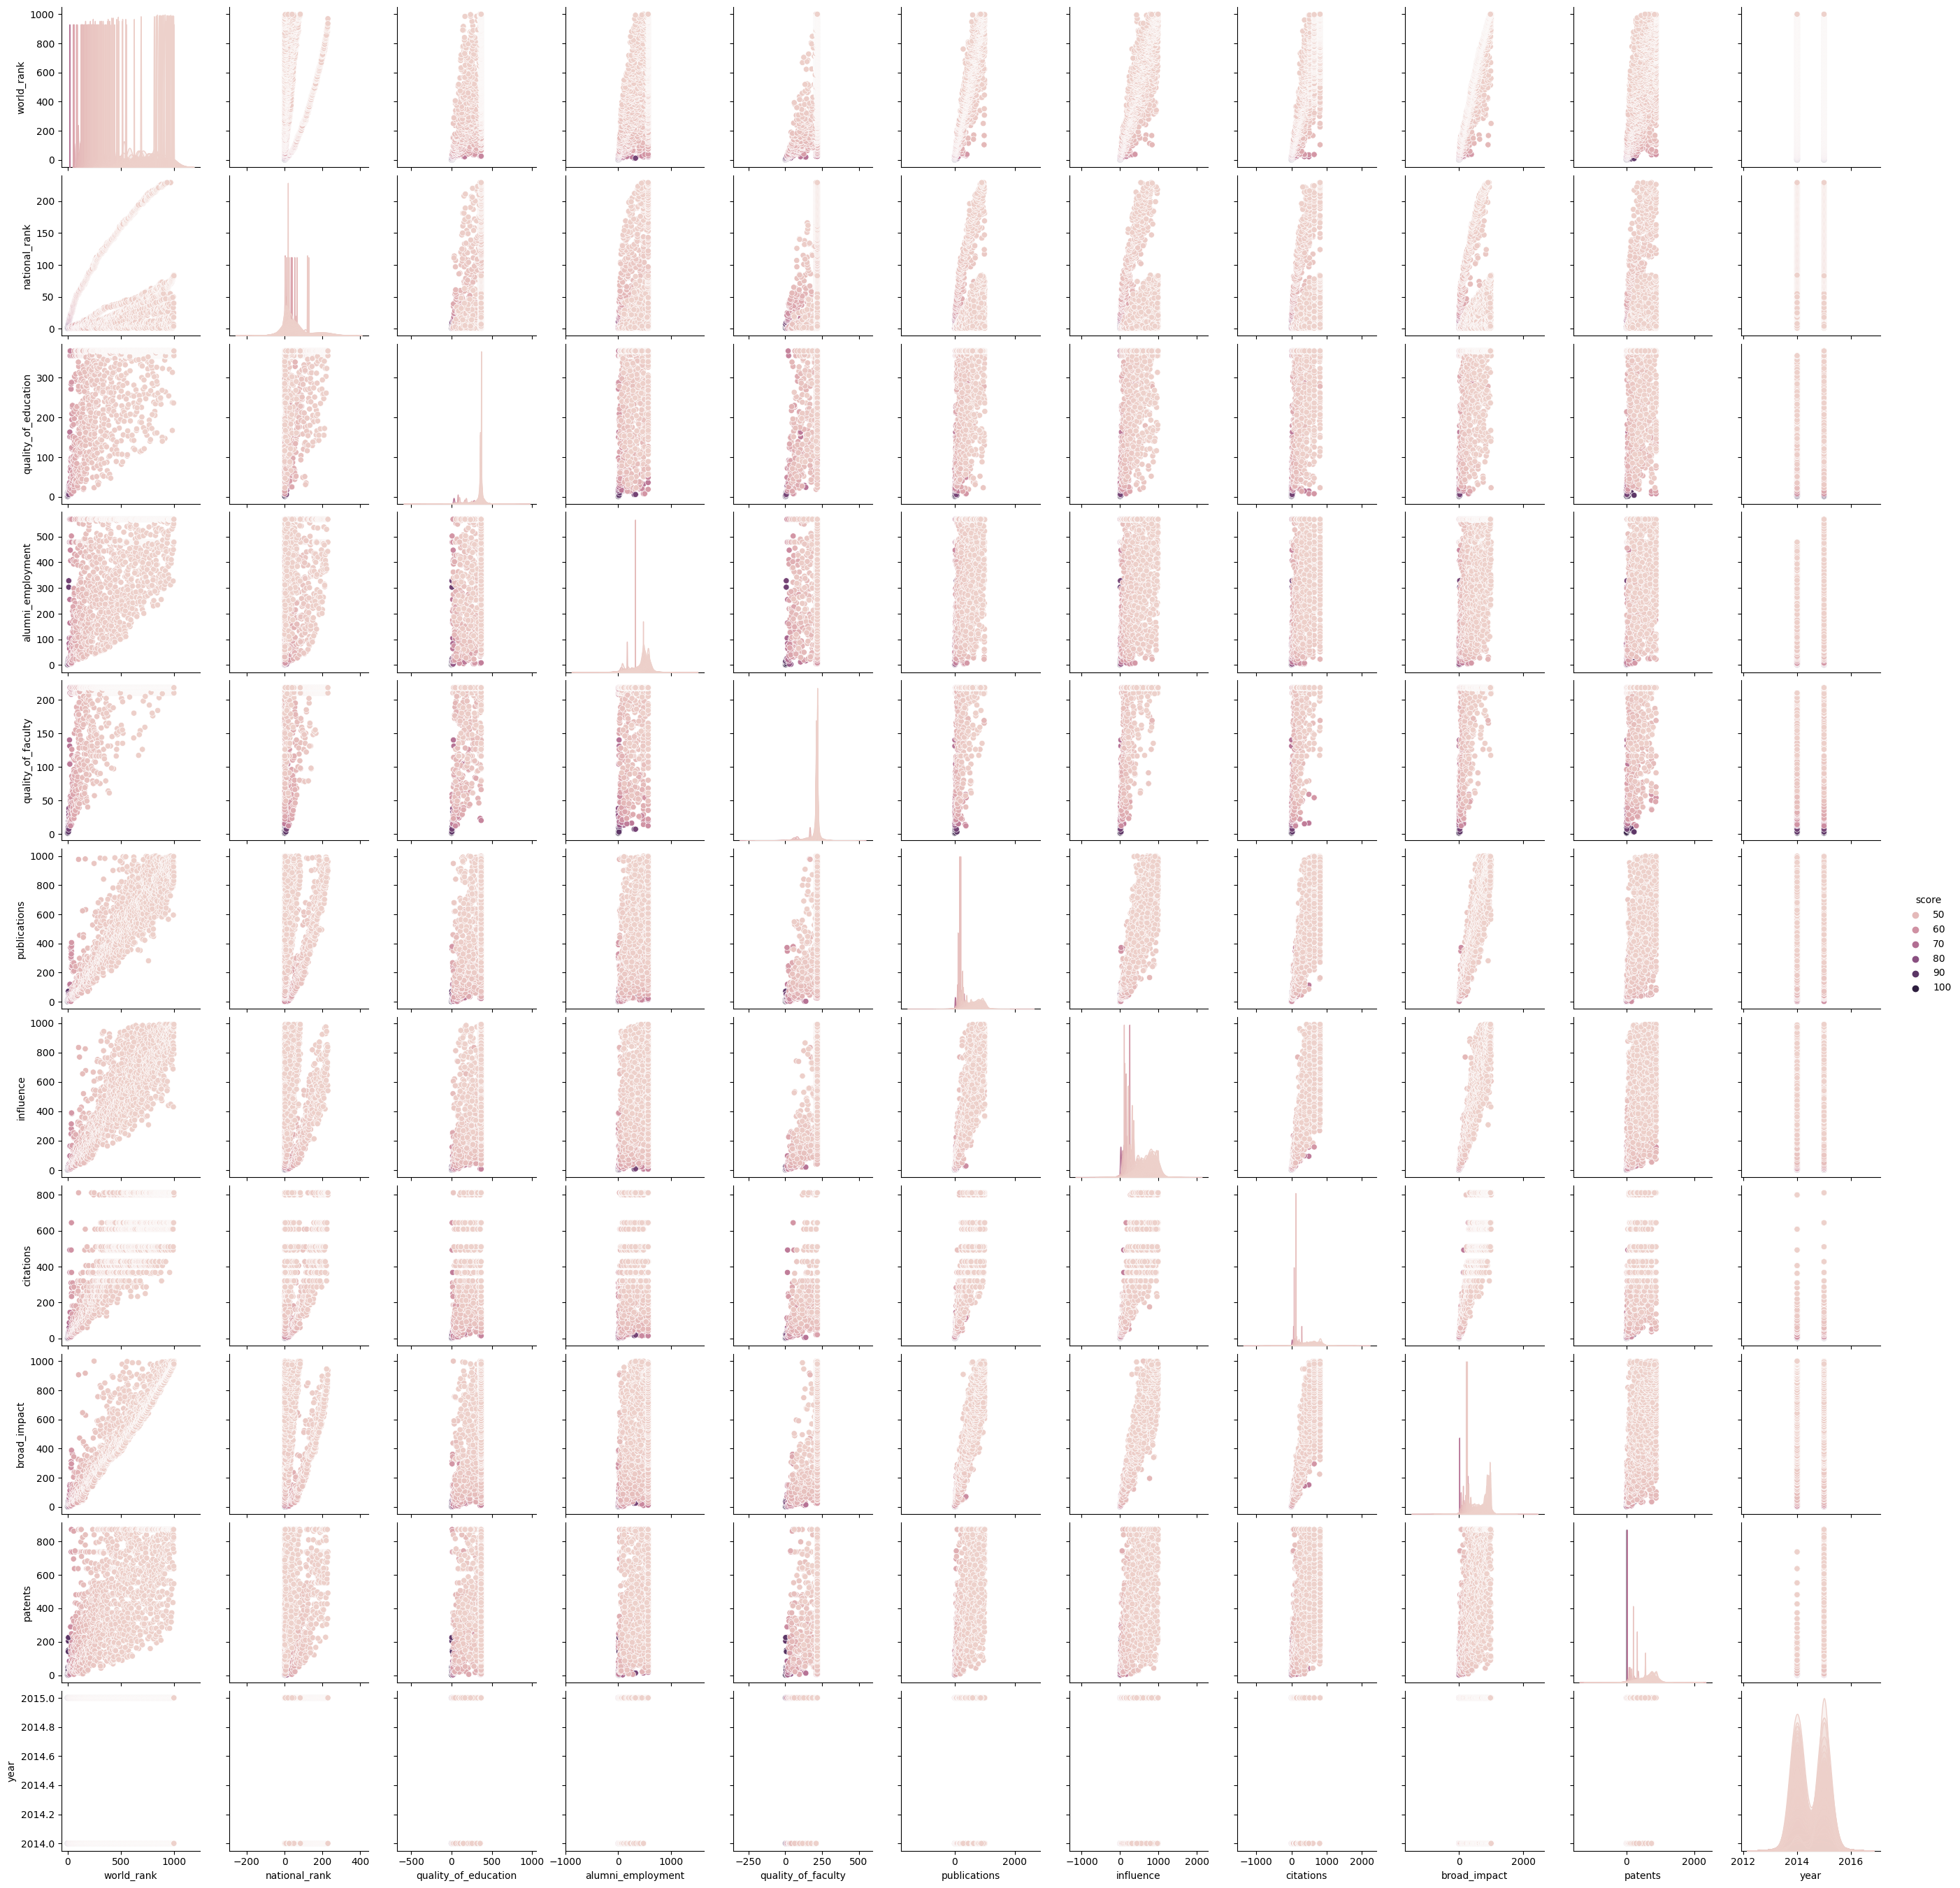

In [65]:
sns.pairplot(df, hue='score')

## Pivot table
It shows the amount of universities in each country in 2014 and 2015.
I took 10 universities with the biggest amount og universities.

In [43]:
pivot_table = df.groupby(by=['year', 'country']).size().reset_index(name='university_count')
pivot_table = pivot_table.sort_values(by='university_count', ascending=False)[:10] # 10 big countries
pivot_table

,year,country,university_count
54,2014,USA,229
113,2015,USA,229
8,2014,China,84
67,2015,China,83
87,2015,Japan,74
28,2014,Japan,74
116,2015,United Kingdom,65
57,2014,United Kingdom,64
77,2015,Germany,55
18,2014,Germany,55


## This bar compares the amount of universities by year.

## It can be seen that the number of universities has hardly changed in one year

In [108]:
fig = px.bar(pivot_table, x='university_count', y='country', orientation='h',
             title='Amount of Universities in each country',
             color='year',
             labels={'university_count': 'amount of universities'})
fig.update_xaxes(showticklabels=False)          
fig.show()

## I made 2 new dataframes one of them stores values for 2014 and another for 2015

In [112]:
fd_2014 = df.loc[df['year']==2014]
fd_2015 = df.loc[df['year']==2015]

## This graph shows lines of different colours, each colour representing a country. On the x-axis are the universities, on the y-axis their total score. In the end, we can see that USA has a lot of top universities.

In [114]:
fig = px.line(fd_2014, y='score', x='institution', color='country')

fig.update_layout(
    title='2014',
    xaxis_title='Universities',
    yaxis_title='Uni_scores',
    width=1200,
    height=800,
)
fig.update_xaxes(showticklabels=False)

fig.show()

gik = px.line(fd_2015, y='score', x='institution', color='country')

gik.update_layout(
    title='2015',
    xaxis_title='Universities',
    yaxis_title='Uni_scores',
    width=1200,
    height=800,
    xaxis_rangeslider_visible=True
)
gik.update_xaxes(showticklabels=False)

gik.show()

## Another two new datasets. One of them stores amount of universities in each country in 2014 and another in 2015

In [145]:
pivot_table_2014 = fd_2014.groupby(by=['country']).size().reset_index(name='university_count')
pivot_table_2014 = pivot_table_2014.sort_values(by='university_count', ascending=False)[:10] # 10 big countries in 2014
pivot_table_2015 = fd_2015.groupby(by=['country']).size().reset_index(name='university_count')
pivot_table_2015 = pivot_table_2015.sort_values(by='university_count', ascending=False)[:10] # 10 big countries in 2015   
pivot_table_2014

,country,university_count
54,USA,229
8,China,84
28,Japan,74
57,United Kingdom,64
18,Germany,55
17,France,50
27,Italy,47
48,Spain,41
47,South Korea,34
6,Canada,32


## This graphs represent what is the percentage of good universities in each country in 2014 and in 2015

In [96]:
fig = px.pie(pivot_table_2014,
             values='university_count',
             title='Percent of best Universities in 10 big countries in 2014',
             names='country',
             color='country'
)
fig.show()

fig = px.pie(pivot_table_2015,
             values='university_count',
             title='Percent of best Universities in 10 big countries in 2015',
             names='country'
)
fig.show()

## It can be seen that in South Korea, Canada, France and Great Britain the percentage has increased and therefore the number of universities in these countries has increased, while in the rest of the countries it has decreased.

# This is the same graph, but with numerical values.

In [50]:
fig = px.bar(pivot_table_2014, x='university_count', y='country', orientation='h',
             title='Amount of Universities in each country in 2014',
             labels={'university_count': 'amount of universities'},
             color='country'
)
fig.show()

fig = px.bar(pivot_table_2014, x='university_count', y='country', orientation='h',
             title='Amount of Universities in each country in 2015',
             labels={'university_count': 'amount of universities'},
             color='country'
             
)
fig.show()

In [52]:
best_uni = df.loc[(df['national_rank']==1)]

## I made two dataset/ Each of them contains information about best university in each country in 2014 and 2015.

In [53]:
uni_2014 = best_uni.loc[df['year']==2014]
uni_2014 = uni_2014.sort_values(by=['world_rank'])[:10] #10 best unis in 2014

uni_2015 = best_uni.loc[df['year']==2015]
uni_2015 = uni_2015.sort_values(by=['world_rank'])[:10] # 10 best unis in 2015

## Top 10 university in 2014 and 2015.

In [54]:
fig = px.bar(uni_2014, x='institution', y='score', title='10 best univesity in 2014')
fig.show()


fig = px.bar(uni_2015, x='institution', y='score', title='10 best univesity in 2015')
fig.show()

## Average university in some countries. I made a dataframe with mean values.

In [125]:
#average uni in each country
value = ['world_rank', 'quality_of_education', 'alumni_employment', 'publications', 'influence', 'citations', 'broad_impact', 'patents', 'score']
pivot_tablo = df[:100].sort_values(by=['world_rank']).pivot_table(index='country', values= value, aggfunc='mean')
pivot_tablo = pivot_tablo
pivot_tablo

,alumni_employment,broad_impact,citations,influence,patents,publications,quality_of_education,score,world_rank
country,,,,,,,,,
Australia,129.500000,87.500000,74.000000,95.500000,147.000000,47.500000,131.500000,51.505000,96.000000
Belgium,225.000000,59.000000,75.000000,111.000000,64.000000,53.000000,355.000000,51.720000,94.000000
Canada,125.000000,27.000000,27.666667,37.000000,143.666667,21.000000,67.000000,58.003333,44.666667
China,49.000000,158.500000,192.000000,173.500000,11.500000,72.000000,324.500000,53.950000,71.000000
Denmark,143.000000,34.000000,61.000000,44.000000,481.000000,44.000000,111.000000,52.940000,79.000000
France,331.250000,193.500000,239.000000,141.500000,339.000000,196.250000,55.000000,57.307500,47.250000
Germany,248.750000,86.000000,126.000000,85.000000,166.750000,98.500000,40.250000,51.965000,92.000000
Israel,285.000000,146.333333,306.333333,91.000000,39.666667,147.333333,35.666667,59.520000,48.666667
Italy,178.000000,145.000000,250.000000,162.000000,373.000000,78.000000,66.000000,52.120000,91.000000


## Comparing countries by mean value of aspect. In other words comparing average university in each coutry by some aspects.

In [146]:
trace1 = go.Scatter(x=pivot_tablo.index, y=pivot_tablo['quality_of_education'], name='Quality of Education')
trace2 = go.Scatter(x=pivot_tablo.index, y=pivot_tablo['publications']*-1, name='Publications')
trace3 = go.Scatter(x=pivot_tablo.index, y=pivot_tablo['patents']*-1, name='Patents')

fig = go.Figure([trace1, trace2, trace3])

fig.update_layout(title='Comparing countries by mean value of aspect',
                  xaxis=dict(title='Compare'),
                  yaxis=dict(title='Mean value'),
                  xaxis_rangeslider_visible=True)
fig.show()

trace1 = go.Scatter(x=pivot_tablo.index, y=pivot_tablo['quality_of_education']*-1,  mode='markers',name='Quality of Education')
trace2 = go.Scatter(x=pivot_tablo.index, y=pivot_tablo['publications']*-1, mode='markers',name='Publications')
trace3 = go.Scatter(x=pivot_tablo.index, y=pivot_tablo['patents']*-1,  mode='markers', name='Patents')


fig = go.Figure([trace1, trace2, trace3])

fig.update_layout(title='Comparing by aspects',
                  xaxis=dict(title='Countries'),
                  yaxis=dict(title='Average univirsity in country'),
                  xaxis_rangeslider_visible=True)



fig.show()

## Conclusion
As we can see In almost all countries, the average publication rate is higher than the patent rate and the quality of education. Many countries have difficulties with patents.

In [57]:
fig = px.imshow(pivot_tablo.T, labels=dict(x='Countries', y='Aspects', color='country'),
                x=pivot_tablo.T.columns, y=pivot_tablo.T.index,
                color_continuous_scale='viridis', title='Comparing graphs by all exponents')
fig.show()

## Corelation.
The darker the cell in this matrix, the better. It can be seen that Russian, Swedish and Taiwanese universities have difficulties with patents. 

In [58]:
usa_2014 = df.loc[(df['country']=='USA') & (df['year']==2014)].drop(['year', 'national_rank'], axis=1)[:10]
uk_2014 = df.loc[(df['country']=='United Kingdom') & (df['year']==2014)].drop(['year', 'national_rank'], axis=1)[:10]
china_2014 = df.loc[(df['country']=='China') & (df['year']==2014)].drop(['year', 'national_rank'], axis=1)[:10]

usa_2015 = df.loc[(df['country']=='USA') & (df['year']==2015)].drop(['year', 'national_rank'], axis=1)[:10]
uk_2015 = df.loc[(df['country']=='United Kingdom') & (df['year']==2015)].drop(['year', 'national_rank'], axis=1)[:10]
china_2015 = df.loc[(df['country']=='China') & (df['year']==2015)].drop(['year', 'national_rank'], axis=1)[:10]

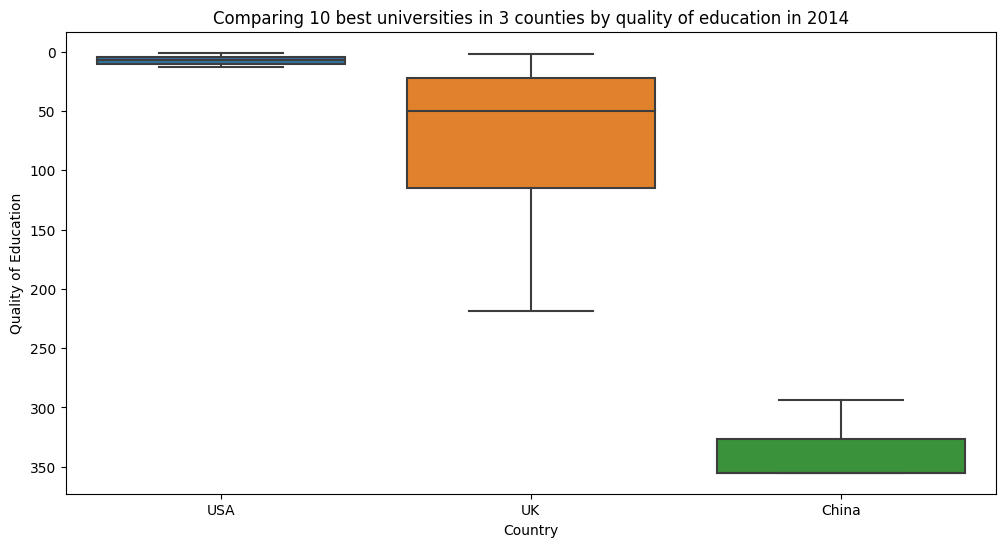

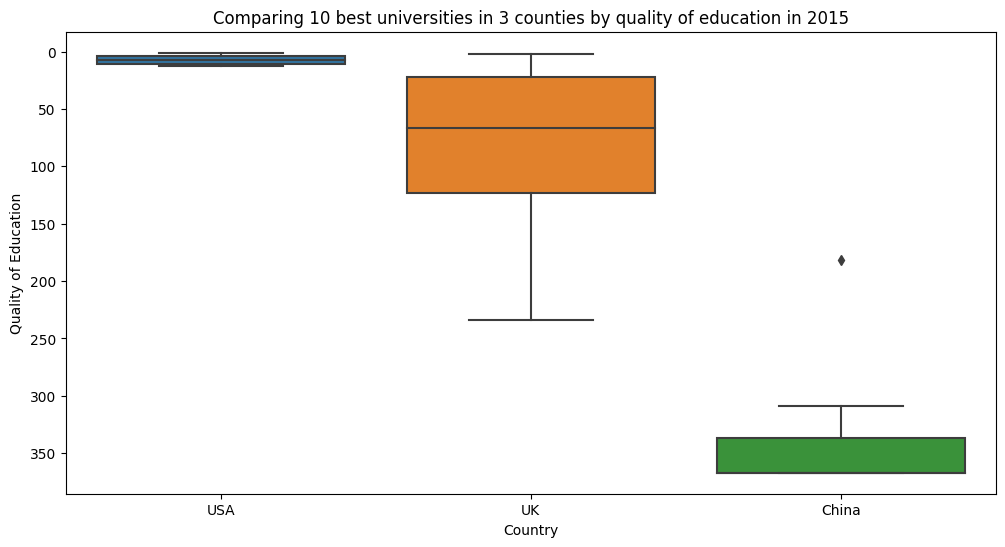

In [59]:
data_2014 = pd.concat([usa_2014, uk_2014, china_2014], keys=['USA', 'UK', 'China'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_2014, x=data_2014.index.get_level_values(0), y='quality_of_education')
plt.title('Comparing 10 best universities in 3 counties by quality of education in 2014')
plt.xlabel('Country')
plt.ylabel('Quality of Education')

plt.gca().invert_yaxis() #for comfortability

plt.show()

data_2015 = pd.concat([usa_2015, uk_2015, china_2015], keys=['USA', 'UK', 'China'])
L
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_2015, x=data_2015.index.get_level_values(0), y='quality_of_education')
plt.title('Comparing 10 best universities in 3 counties by quality of education in 2015')
plt.xlabel('Country')
plt.ylabel('Quality of Education')

plt.gca().invert_yaxis() #for comfortability

plt.show()

## These 2 boxplots used to compare the quality of education at the top 10 universities in three countries for two years.
It can be concluded that the range of values in USA is very small and if we look at the graph, we can see that the values are very small, so the quality of education of universities in USA is very high.

In [98]:
average_usa_2014 = usa_2014.mean(numeric_only=True)
average_uk_2014 = uk_2014.mean(numeric_only=True)
average_china_2014 = china_2014.mean(numeric_only=True)

data_2014 = pd.concat([average_usa_2014, average_uk_2014, average_china_2014], axis=1)
data_2014.columns = ['USA', 'UK', 'China']

data_2014 = -data_2014 #for comfortable vision

fig = px.line(data_2014, x=data_2014.index, y=['USA', 'UK', 'China'], 
              labels={'value': 'Value', 'variable': 'Country'},
              title='Comparing 3 countries by mean values in 2014')

fig.show()

average_usa_2015 = usa_2015.mean(numeric_only=True)
average_uk_2015 = uk_2015.mean(numeric_only=True)
average_china_2015 = china_2015.mean(numeric_only=True)

data_2015 = pd.concat([average_usa_2015, average_uk_2015, average_china_2015], axis=1)
data_2015.columns = ['USA', 'UK', 'China']

data_2015 = -data_2015 #for comfortable vision

fig = px.line(data_2015, x=data_2015.index, y=['USA', 'UK', 'China'], 
              labels={'value': 'Value', 'variable': 'Country'},
              title='Comparing 3 countries by mean values in 2015')

fig.show()

## These two graphs compare the average values of different indicators at universities in USA, United Kingdom and China in 2014 and 2015. The x-axis represents the different indicators, while the y-axis represents the average values of these indicators.
It can be seen that universities in the USA consistently score high on all indicators, while universities from China have highly variable indicator values. Universities in the UK also have highly variable values, but not as much as universities in in China. 

In [62]:
big_countries = ['USA', 'China', 'Japan', 'United Kingdom', 'Germany', 'France', 'Russia', 'Canada', 'Italy', 'Netherlands']
poi = df[df['country'].isin(big_countries)]
poi = poi.loc[(poi['national_rank']<5)&(poi['world_rank']<100)]
#исправить все на 2014

In [149]:
px.sunburst(poi, color='country', path=['country', 'institution', 'world_rank', 'national_rank', 'year'], hover_name='country')

## Overall:
USA is the best country to get a degree. The universities there are advanced by every aspect, also there are a lot of universities. Education in Europe are also developed, but not as strong as American universities. Education in coutries such a China or Japan are also strong. But it have to be mentioned that all information All information is provided for 2014 and 2015, things may have changed in 10 years.   